<a href="https://colab.research.google.com/github/Jems-Chawin/Machine-Learning-Lab/blob/main/Lab3/Lab3_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 3 - PART 2 Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
import yfinance as yf

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [ ]:
### START CODE HERE ###
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-12-31')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [ ]:
stk_data

Price        Adj Close                               Close              \
Ticker           GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   84.379440   96.272560   52.248001  108.671127   
2019-01-02   52.734001   85.522614   95.846008   52.734001  110.143402   
2019-01-03   51.273499   83.815285   92.320038   51.273499  107.944550   
2019-01-04   53.903500   87.088913   96.613777   53.903500  112.160614   
2019-01-07   53.796001   87.705009   96.737000   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2023-12-22  141.490005  160.675140  373.888580  141.490005  162.139999   
2023-12-26  141.520004  161.735489  373.968445  141.520004  163.210007   
2023-12-27  140.369995  161.983231  373.379547  140.369995  163.460007   
2023-12-28  140.229996  162.270599  374.587280  140.229996  163.750000   
2023-12-29  139.690002  162.072403  375.345886  139.690002  163.550003   

Price                         High                                 Low  \
Ticker            MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2023-12-22  374.579987  141.990005  162.410004  375.179993  140.710007   
2023-12-26  374.660004  142.679993  163.309998  376.940002  141.190002   
2023-12-27  374.070007  142.080002  163.639999  375.059998  139.889999   
2023-12-28  375.279999  141.139999  163.960007  376.459991  139.750000   
2023-12-29  376.040009  140.360001  164.179993  377.160004  138.779999   

Price                                     Open                          \
Ticker             IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2023-12-22  161.000000  372.709991  140.770004  161.100006  373.679993   
2023-12-26  162.050003  373.500000  141.589996  162.229996  375.000000   
2023-12-27  162.679993  372.809998  141.589996  163.139999  373.690002   
2023-12-28  163.399994  374.160004  140.779999  163.960007  375.369995   
2023-12-29  162.830002  373.480011  139.630005  163.750000  376.000000   

Price         Volume                     
Ticker         GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2023-12-22  26514600  2439800  17091100  
2023-12-26  16780300  1772400  12673100  
2023-12-27  19628600  3234600  14905400  
2023-12-28  16045700  2071300  14327000  
2023-12-29  18727200  2525600  18723000  

[1259 rows x 18 columns]

In [ ]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-02-25,111.07,1.3059
2019-02-26,110.76,1.3252
2019-02-27,110.92,1.3318
2019-02-28,111.38,1.3274
2019-03-01,111.89,1.3222
...,...,...
2024-02-12,149.37,1.2631
2024-02-13,150.72,1.2606
2024-02-14,150.50,1.2562


In [ ]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-02-25,2796.11,26091.95,14.85
2019-02-26,2793.90,26057.98,15.17
2019-02-27,2792.38,25985.16,14.70
2019-02-28,2784.49,25916.00,14.70
2019-03-01,2803.69,26026.32,13.57
...,...,...,...
2024-02-15,5029.73,38773.12,14.01
2024-02-16,5005.57,38627.99,14.24
2024-02-19,NaN,NaN,14.71


Let's
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [ ]:
### START CODE HERE ###
base = stk_data['Adj Close']['MSFT']
X1 = stk_data['Adj Close'][['GOOGL', 'IBM']]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###

In [ ]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2019-02-25,2796.11,26091.95,14.85
2019-02-26,2793.90,26057.98,15.17
2019-02-27,2792.38,25985.16,14.70
2019-02-28,2784.49,25916.00,14.70
2019-03-01,2803.69,26026.32,13.57
...,...,...,...
2024-02-15,5029.73,38773.12,14.01
2024-02-16,5005.57,38627.99,14.24
2024-02-19,NaN,NaN,14.71


**Standardize `X1-3`**

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.


In [ ]:
### START CODE HERE ###
standard_scaler = preprocessing.StandardScaler()
X1_scaled = pd.DataFrame(standard_scaler.fit_transform(X1),columns=X1.columns,index=X1.index)
X2_scaled = pd.DataFrame(standard_scaler.fit_transform(X2),columns=X2.columns,index=X2.index)
X3_scaled = pd.DataFrame(standard_scaler.fit_transform(X3),columns=X3.columns,index=X3.index)
### END CODE HERE ###

In [ ]:
X3_scaled

,SP500,DJIA,VIXCLS
DATE,,,
2019-02-25,-1.618088,-1.314872,-0.770990
2019-02-26,-1.621587,-1.323554,-0.732377
2019-02-27,-1.623993,-1.342167,-0.789090
2019-02-28,-1.636483,-1.359844,-0.789090
2019-03-01,-1.606089,-1.331646,-0.925444
...,...,...,...
2024-02-15,1.917778,1.926368,-0.872351
2024-02-16,1.879532,1.889273,-0.844597
2024-02-19,NaN,NaN,-0.787884


Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [ ]:
### START CODE HERE ###
return_period = 5
k = [3, 6, 12]

Y = base.shift(-return_period)

### Guide#1 for using price of past [k]*n days (uncomment to use)
# X4_3DT = pd.DataFrame({'MSFT_3DT': base.diff(k[0] * return_period)})
# X4_6DT = pd.DataFrame({'MSFT_6DT': base.diff(k[1] * return_period)})
# X4_12DT = pd.DataFrame({'MSFT_12DT': base.diff(k[2] * return_period)})

### Guide#2 for using price of next [k]*n days (uncomment to use)
X4_3DT = pd.DataFrame({'MSFT_3DT': base.diff(k[0] * return_period).shift(-k[0] * return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT': base.diff(k[1] * return_period).shift(-k[1] * return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT': base.diff(k[2] * return_period).shift(-k[2] * return_period)})

X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
### END CODE HERE ###

In [ ]:
X4

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2018-12-31,4.871925,4.966682,15.032227
2019-01-02,4.815056,5.478546,16.420166
2019-01-03,9.260437,10.255692,20.974182
2019-01-04,2.985725,5.914551,16.842270
2019-01-07,0.834122,5.258263,17.461540
...,...,...,...
2023-12-22,NaN,NaN,NaN
2023-12-26,NaN,NaN,NaN
2023-12-27,NaN,NaN,NaN


In [ ]:
X4_scaled = pd.DataFrame(standard_scaler.fit_transform(X4),columns=X4.columns,index=X4.index)

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [ ]:
### START CODE HERE ###
X = pd.concat([X1_scaled, X2_scaled, X3_scaled, X4_scaled],axis=1)
dataset = pd.concat([X, Y],axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [ ]:
dataset

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
2018-12-31,-1.545902,-1.988831,NaN,NaN,NaN,NaN,NaN,0.109251,-0.090283,0.088891,97.438416
2019-01-02,-1.529536,-1.914431,NaN,NaN,NaN,NaN,NaN,0.105275,-0.063592,0.141580,98.831741
2019-01-03,-1.578717,-2.025547,NaN,NaN,NaN,NaN,NaN,0.416051,0.185518,0.314458,98.196671
2019-01-04,-1.490155,-1.812494,NaN,NaN,NaN,NaN,NaN,-0.022613,-0.040856,0.157604,97.438416
2019-01-07,-1.493775,-1.772397,NaN,NaN,NaN,NaN,NaN,-0.173031,-0.075078,0.181112,96.727539
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-15,NaN,NaN,1.911297,-0.372176,1.917778,1.926368,-0.872351,NaN,NaN,NaN,NaN
2024-02-16,NaN,NaN,1.920962,-0.357119,1.879532,1.889273,-0.844597,NaN,NaN,NaN,NaN
2024-02-19,NaN,NaN,NaN,NaN,NaN,NaN,-0.787884,NaN,NaN,NaN,NaN
2024-02-20,NaN,NaN,NaN,NaN,1.831947,1.872867,-0.702210,NaN,NaN,NaN,NaN


In [ ]:
dataset.rename(columns={'GOOGL': '(Adj Close, GOOGL)'}, inplace=True)
dataset.rename(columns={'IBM': '(Adj Close, IBM)'}, inplace=True)
dataset.rename(columns={'MSFT': '(Adj Close, MSFT)'}, inplace=True)
dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
2018-12-31,-1.545902,-1.988831,NaN,NaN,NaN,NaN,NaN,0.109251,-0.090283,0.088891,97.438416
2019-01-02,-1.529536,-1.914431,NaN,NaN,NaN,NaN,NaN,0.105275,-0.063592,0.141580,98.831741
2019-01-03,-1.578717,-2.025547,NaN,NaN,NaN,NaN,NaN,0.416051,0.185518,0.314458,98.196671
2019-01-04,-1.490155,-1.812494,NaN,NaN,NaN,NaN,NaN,-0.022613,-0.040856,0.157604,97.438416
2019-01-07,-1.493775,-1.772397,NaN,NaN,NaN,NaN,NaN,-0.173031,-0.075078,0.181112,96.727539
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-15,NaN,NaN,1.911297,-0.372176,1.917778,1.926368,-0.872351,NaN,NaN,NaN,NaN
2024-02-16,NaN,NaN,1.920962,-0.357119,1.879532,1.889273,-0.844597,NaN,NaN,NaN,NaN
2024-02-19,NaN,NaN,NaN,NaN,NaN,NaN,-0.787884,NaN,NaN,NaN,NaN
2024-02-20,NaN,NaN,NaN,NaN,1.831947,1.872867,-0.702210,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [ ]:
### START CODE HERE ###
dataset = dataset.dropna()
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1150 entries, 2019-02-25 to 2023-10-04
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1150 non-null   float64
 1   (Adj Close, IBM)    1150 non-null   float64
 2   DEXJPUS             1150 non-null   float64
 3   DEXUSUK             1150 non-null   float64
 4   SP500               1150 non-null   float64
 5   DJIA                1150 non-null   float64
 6   VIXCLS              1150 non-null   float64
 7   MSFT_3DT            1150 non-null   float64
 8   MSFT_6DT            1150 non-null   float64
 9   MSFT_12DT           1150 non-null   float64
 10  (Adj Close, MSFT)   1150 non-null   float64
dtypes: float64(11)
memory usage: 107.8 KB


,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,-0.016894,-0.074831,-0.137114,0.035808,-0.105075,-0.103553,0.068759,-0.029129,-0.038661,-0.006220,229.889273
std,0.968773,0.862395,0.906037,1.027312,0.963440,0.961975,1.014945,0.993647,0.993749,1.017643,66.557477
min,-1.556374,-2.632217,-1.160387,-3.198328,-2.502538,-3.231837,-1.170399,-3.401333,-3.346107,-3.264430,105.079376
25%,-0.922474,-0.749459,-0.808242,-0.697778,-1.061918,-1.026100,-0.607788,-0.569003,-0.586181,-0.579967,175.486195
50%,0.023184,-0.074985,-0.646184,0.057694,0.128815,0.153130,-0.150157,0.051320,0.029630,0.020928,238.479248
75%,0.806855,0.488187,0.770772,0.786817,0.720005,0.725765,0.524977,0.549070,0.612970,0.670425,282.802971
max,1.740315,2.074343,1.887455,2.048949,1.548665,1.421959,7.415082,2.577490,2.605320,2.749578,357.343018


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [ ]:
### START CODE HERE ###
Y = dataset['(Adj Close, MSFT)']
X = dataset.drop('(Adj Close, MSFT)', axis=1)

### END CODE HERE ###

**Calculate the Correlation**

Drop columns that have correlation more than 0.9.

In [ ]:
### START CODE HERE ###
correlation_matrix = X.corr()
# Find columns with correlation greater than 0.9
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_cols.add(colname)

# Drop highly correlated columns from X
X_filtered = X.drop(columns=highly_correlated_cols)

# Show dropped columns
dropped_columns = set(X.columns) - set(X_filtered.columns)
print("Dropped Columns:", dropped_columns)
### END CODE HERE ###

Dropped Columns: {'SP500', 'DJIA'}


In [ ]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-02-25,-1.424054,-0.664380,-0.609456,0.349042,-1.618088,-1.314872,-0.770990,0.166603,0.064700,0.088450
2019-02-26,-1.416174,-0.651674,-0.629431,0.639637,-1.621587,-1.323554,-0.732377,0.120687,-0.005784,0.088554
2019-02-27,-1.414693,-0.678554,-0.619121,0.739012,-1.623993,-1.342167,-0.789090,0.124681,0.048817,0.041378
2019-02-28,-1.408530,-0.729383,-0.589480,0.672762,-1.636483,-1.359844,-0.789090,0.313674,0.062715,0.048614
2019-03-01,-1.371540,-0.677087,-0.556618,0.594467,-1.606089,-1.331646,-0.925444,0.069447,0.068672,0.027644
...,...,...,...,...,...,...,...,...,...,...
2023-09-28,1.150068,1.548236,1.846216,-0.909702,0.762126,0.621102,-0.470529,0.999880,2.094709,1.851432
2023-09-29,1.101242,1.466610,1.862325,-0.923253,0.743683,0.580503,-0.448808,0.529121,2.451569,1.774675
2023-10-02,1.212701,1.498496,1.886166,-1.049730,0.744222,0.561551,-0.437948,0.292343,1.981990,1.523539
2023-10-03,1.154109,1.472349,1.844927,-1.141576,0.650918,0.451397,-0.176100,0.962273,2.605320,1.887409


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [ ]:
### START CODE HERE ###
from sklearn.model_selection import train_test_split
X = X.sort_index()
Y = Y.sort_index()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
### START CODE HERE ###

### **Grid Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- Your parameters are assigned according to Lab direction.
- `Linear Regression: {'fit_intercept': [True, False]}`
- `SVR: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

linear_parameters = {'fit_intercept': [True, False]}

svr_parameters_grid = {'kernel': ['linear', 'rbf', 'poly'],
                       'C': [0.1, 1, 10],
                       'gamma': [0.01, 0.1, 1],
                       'degree': [2, 3]}

linear_reg_model = LinearRegression()
svr_model = SVR()

grid_search_lr = GridSearchCV(linear_reg_model, linear_parameters, cv=2, n_jobs = -1, verbose = 2)
grid_search_svr = GridSearchCV(svr_model, svr_parameters_grid, cv=2, n_jobs = -1, verbose = 2)
### END CODE HERE ###

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [ ]:
### START CODE HERE ###
# Grid search SVR
grid_search_svr.fit(X_train, Y_train)
print("SVR best params:", grid_search_svr.best_params_)
print("SVR best score:", grid_search_svr.best_score_)
print("SVR score mean:", grid_search_svr.cv_results_['mean_test_score'].mean())
print("SVR score std:", grid_search_svr.cv_results_['mean_test_score'].std())

# Grid search Linear Regression
grid_search_lr.fit(X_train, Y_train)
print("LR best params:", grid_search_lr.best_params_)
print("LR best score:", grid_search_lr.best_score_)
print("LR score mean:", grid_search_lr.cv_results_['mean_test_score'].mean())
print("LR score std:", grid_search_lr.cv_results_['mean_test_score'].std())
### END CODE HERE ###

Fitting 2 folds for each of 54 candidates, totalling 108 fits
SVR best params: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}
SVR best score: 0.5540618833358821
SVR score mean: -6.273935454493433
SVR score std: 5.001418345031685
Fitting 2 folds for each of 2 candidates, totalling 4 fits
LR best params: {'fit_intercept': True}
LR best score: 0.618131925099712
LR score mean: -24.159090650919776
LR score std: 24.777222576019486


Utilize the best parameters obtained from grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the compared dataframe with the Y_train.



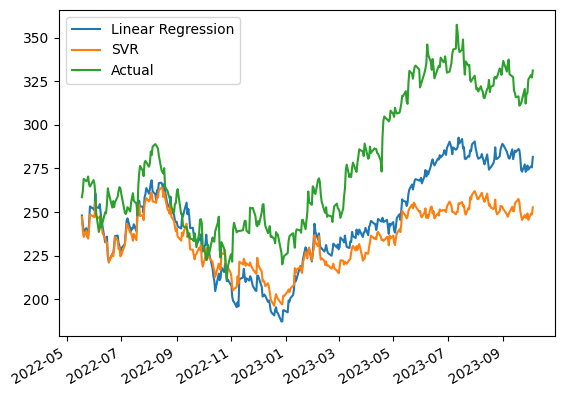

In [ ]:
### START CODE HERE ###
# Get best parameters
lr_best_params = grid_search_lr.best_params_
svr_best_params = grid_search_svr.best_params_

# Create models with best parameters
lr_best = LinearRegression(**lr_best_params)
svr_best = SVR(**svr_best_params)

# Fit on full training data
lr_best.fit(X_train, Y_train)
svr_best.fit(X_train, Y_train)

# Predict on test set
lr_preds = lr_best.predict(X_test)
svr_preds = svr_best.predict(X_test)

# Compare to test set
results = pd.DataFrame({
    'Linear Regression': lr_preds,
    'SVR': svr_preds,
    'Actual': Y_test
})

# Plot comparison
results.plot()

# Concatenate with training data
final_results = pd.concat([Y_train, results])
### END CODE HERE ###

### **Random Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `{'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'epsilon': [0.1, 1, 5], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

linear_parameters = {'fit_intercept': [True, False]}

svr_parameters_random = {'kernel': ['linear', 'rbf', 'poly'],
                         'C': [0.1, 10],
                         'gamma': [0.1, 10],
                         'degree': [2, 3]}

linear_reg_model = LinearRegression()
svr_model = SVR()

random_search_lr = RandomizedSearchCV(linear_reg_model, linear_parameters, cv=2, n_jobs = -1, verbose = 2)
random_search_svr = RandomizedSearchCV(svr_model, svr_parameters_random, n_iter=50, cv=2, n_jobs = -1, verbose = 2)
### END CODE HERE ###

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [ ]:
### START CODE HERE ###
# Random search SVR
random_search_svr.fit(X_train, Y_train)
print("SVR best params:", random_search_svr.best_params_)
print("SVR best score:", random_search_svr.best_score_)
print("SVR score mean:", random_search_svr.cv_results_['mean_test_score'].mean())
print("SVR score std:", random_search_svr.cv_results_['mean_test_score'].std())

# Random search Linear Regression
random_search_lr.fit(X_train, Y_train)
print("LR best params:", random_search_lr.best_params_)
print("LR best score:", random_search_lr.best_score_)
print("LR score mean:", random_search_lr.cv_results_['mean_test_score'].mean())
print("LR score std:", random_search_lr.cv_results_['mean_test_score'].std())
### END CODE HERE ###

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 24 candidates, totalling 48 fits


Utilize the best parameters obtained from random grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the comared dataframe with the Y_train.


In [ ]:
### START CODE HERE ###
# Get best parameters
lr_best_params = random_search_lr.best_params_
svr_best_params = random_search_svr.best_params_

# Create models with best parameters
lr_best = LinearRegression(**lr_best_params)
svr_best = SVR(**svr_best_params)

# Fit on full training data
lr_best.fit(X_train, Y_train)
svr_best.fit(X_train, Y_train)

# Predict on test set
lr_preds = lr_best.predict(X_test)
svr_preds = svr_best.predict(X_test)

# Compare to test set
results = pd.DataFrame({
    'Linear Regression': lr_preds,
    'SVR': svr_preds,
    'Actual': Y_test
})

# Plot comparison
results.plot()

# Concatenate with training data
final_results = pd.concat([Y_train, results])
### END CODE HERE ###

### Question
1. Rank Top 3 Best parameters of SVM Models from GridSearchCV.
2. Rank Top 3 Best parameters of SVM Models from RandomizedSearchCV.
3. Are those best parameters from GridSearchCV similar to RandomizedSearchCV? Explain?
4. What is the Mean Squared Error (MSE) for the best parameters obtained through both GridSearchCV and RandomizedSearchCV??